In [1]:
### https://github.com/ComputationalSystemsBiology/momix-notebook/blob/master/scripts/runfactorization.R


##### runfactoization runs all the considered multi-omics factorization
### the required inputs are:
### "folder" corresponding to the path to the folder where the input files are contained, in the idea that all omics matrices are organized inside a unique folder
### "file.names" corresponding to a vector containing the names of all the omics files
### "num.factors" containing the number of factors in which we desire to decompose the matrices
### "sep=" "" corresponding to the separator used in the omics files required to properly read them
### "single.cell" indicating if the data are single cell data. In this case the filtering of the data will be more intense in respect to other data types
### "filtering"

### the input files need to be log2 transformed before running the analysis


library("RGCCA")
library("r.jive")
library("IntNMF")
library("omicade4")
library("MSFA")
library("GPArotation")
library("MOFAtools")
library("tensorBSS")
source("tICA.R")
library("iCluster")

Loading required package: MASS

Loading required package: NMF

Loading required package: pkgmaker

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 23/24

  To enable shared memory capabilities, try: install.extras('
NMF
')

Loading required package: mclust

Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.

Loading required package: InterSIM

Loading required package: tools

Loading required package: ade4


Attaching package: 'ade4'


The following object is masked from 'package:BiocGenerics':

    score



Attaching package: 'GPArotation'


The following object is masked from 'package:NMF':

    entropy



Attaching package: 'MOFAtools'


The following objects are masked from 'package:NMF':

    featureNames, featureNames<-, predict, sampleNames, sampleNames<-


The following objects are masked f

In [2]:
.libPaths( c( .libPaths(), "/home/amazigh.mokhtari/NeuroDev_ADD/R/r_3.6.0///") )


In [1]:
num.factors = 10
omics = readRDS ("/home//amazigh.mokhtari/NeuroDev_ADD/Psy/CT_Scar/Analysis/CT-Scar/00_RGCCA/RGCCA_Multi_MDD/male_data_momix_omics.RDS")

Warning message in readRDS("/home//amazigh.mokhtari/NeuroDev_ADD/Psy/CT_Scar/Analysis/CT-Scar/00_RGCCA/RGCCA_Multi_MDD/male_data_filtered_adjusted_dnam_fVar_lm.RDS"):
"strings not representable in native encoding will be translated to UTF-8"


In [4]:
  ###MOFA
  MOFAobject <- createMOFAobject( omics[1:3] )
  DataOptions <- getDefaultDataOptions()
  ModelOptions <- getDefaultModelOptions(MOFAobject)
  ModelOptions$numFactors <- num.factors
  TrainOptions <- getDefaultTrainOptions()
  
  MOFAobject <- prepareMOFA(
    MOFAobject,
    DataOptions = DataOptions,
    ModelOptions = ModelOptions,
    TrainOptions = TrainOptions
  )
  MOFAobject <- runMOFA(MOFAobject)
  fatsWeights_mofa <- getWeights(
    MOFAobject
  )
  
  factors_mofa <- getFactors(
    MOFAobject
  )



Creating MOFA object from list of matrices,
 please make sure that samples are columns and features are rows...


Checking data options...

Checking training options...

Checking model options...



[1] "No output file provided, using a temporary file..."


In [19]:
saveRDS (factors_mofa ,fatsWeights_mofa , file = "/home//amazigh.mokhtari/NeuroDev_ADD/Psy/CT_Scar/Analysis/CT-Scar/00_RGCCA/RGCCA_Multi_MDD/000_poster_res/factorizations_mofa.RDS" )


Warning message in if (ascii %in% FALSE) "wb" else "w":
"the condition has length > 1 and only the first element will be used"


ERROR: Error in saveRDS(factors_mofa, fatsWeights_mofa, file = "/home//amazigh.mokhtari/NeuroDev_ADD/Psy/CT_Scar/Analysis/CT-Scar/00_RGCCA/RGCCA_Multi_MDD/000_poster_res/factorizations_mofa.RDS"): 'ascii' must be logical


In [22]:
save (MOFAobject , file = "/home//amazigh.mokhtari/NeuroDev_ADD/Psy/CT_Scar/Analysis/CT-Scar/00_RGCCA/RGCCA_Multi_MDD/000_poster_res/mofa_object.RData" )

In [14]:
lapply(omics[1:3] , rownames  )

$miRNA
 [1] "PCLZ117" "PCLZ118" "PCLZ119" "PCLZ121" "PCLZ122" "PCLZ123" "PCLZ124"
 [8] "PCLZ126" "PCLZ127" "PCLZ130" "PCLZ131" "PCLZ132" "PCLZ133" "PCLZ134"
[15] "PCLZ135" "PCLZ136" "PCLZ137" "PCLZ138" "PCLZ139" "PCLZ140" "PCLZ141"
[22] "PCLZ142" "PCLZ143" "PCLZ144" "PCLZ145" "PCLZ147" "PCLZ148" "PCLZ81" 
[29] "PCLZ82"  "PCLZ83"  "PCLZ84"  "PCLZ85"  "PCLZ87"  "PCLZ88"  "PCLZ89" 
[36] "PCLZ90"  "PCLZ92"  "PCLZ94"  "PCLZ95"  "PCLZ96"  "PCLZ97"  "PCLZ98" 
[43] "PCLZ100" "PCLZ101" "PCLZ102" "PCLZ103" "PCLZ104" "PCLZ105" "PCLZ106"
[50] "PCLZ108" "PCLZ109" "PCLZ110" "PCLZ111" "PCLZ112" "PCLZ113" "PCLZ114"
[57] "PCLZ115" "PCLZ116"

$mRNA
 [1] "PCLZ117" "PCLZ118" "PCLZ119" "PCLZ121" "PCLZ122" "PCLZ123" "PCLZ124"
 [8] "PCLZ126" "PCLZ127" "PCLZ130" "PCLZ131" "PCLZ132" "PCLZ133" "PCLZ134"
[15] "PCLZ135" "PCLZ136" "PCLZ137" "PCLZ138" "PCLZ139" "PCLZ140" "PCLZ141"
[22] "PCLZ142" "PCLZ143" "PCLZ144" "PCLZ145" "PCLZ147" "PCLZ148" "PCLZ81" 
[29] "PCLZ82"  "PCLZ83"  "PCLZ84"  "PCLZ85"  "PCLZ87"  "PCLZ88"  "PCLZ89" 
[36] "PCLZ90"  "PCLZ92"  "PCLZ94"  "PCLZ95"  "PCLZ96"  "PCLZ97"  "PCLZ98" 
[43] "PCLZ100" "PCLZ101" "PCLZ102" "PCLZ103" "PCLZ104" "PCLZ105" "PCLZ106"
[50] "PCLZ108" "PCLZ109" "PCLZ110" "PCLZ111" "PCLZ112" "PCLZ113" "PCLZ114"
[57] "PCLZ115" "PCLZ116"

$DNAm
 [1] "PCLZ117" "PCLZ118" "PCLZ119" "PCLZ121" "PCLZ122" "PCLZ123" "PCLZ124"
 [8] "PCLZ126" "PCLZ127" "PCLZ130" "PCLZ131" "PCLZ132" "PCLZ133" "PCLZ134"
[15] "PCLZ135" "PCLZ136" "PCLZ137" "PCLZ138" "PCLZ139" "PCLZ140" "PCLZ141"
[22] "PCLZ142" "PCLZ143" "PCLZ144" "PCLZ145" "PCLZ147" "PCLZ148" "PCLZ81" 
[29] "PCLZ82"  "PCLZ83"  "PCLZ84"  "PCLZ85"  "PCLZ87"  "PCLZ88"  "PCLZ89" 
[36] "PCLZ90"  "PCLZ92"  "PCLZ94"  "PCLZ95"  "PCLZ96"  "PCLZ97"  "PCLZ98" 
[43] "PCLZ100" "PCLZ101" "PCLZ102" "PCLZ103" "PCLZ104" "PCLZ105" "PCLZ106"
[50] "PCLZ108" "PCLZ109" "PCLZ110" "PCLZ111" "PCLZ112" "PCLZ113" "PCLZ114"
[57] "PCLZ115" "PCLZ116"

In [13]:
MOFAobject <- runMOFA(MOFAobject)

[1] "No output file provided, using a temporary file..."


Removing 10 factors that are constant zero from the model...



ERROR: Error in `factorNames<-`(`*tmp*`, value = paste0("LF", as.character(1:length(nonzero_factors)))): Length of factor names does not match the dimensionality of the latent variable matrix


In [ ]:
omics = readRDS ("/home//amazigh.mokhtari/NeuroDev_ADD/Psy/CT_Scar/Analysis/CT-Scar/00_RGCCA/RGCCA_Multi_MDD/male_data_filtered_adjusted_dnam_fVar_lm.RDS")

In [15]:
calculateVarianceExplained  = calculateVarianceExplained  (MOFAobject)

In [17]:
calculateVarianceExplained$R2PerFactor

,DNAm,mRNA,miRNA
LF1,7.965280e-05,1.273829e-01,9.352562e-02
LF2,1.089063e-05,1.573362e-01,6.373939e-06
LF3,9.573487e-02,1.902822e-05,2.824127e-03
LF4,6.156332e-02,6.423070e-03,3.068388e-04
LF5,5.186153e-05,6.766979e-02,3.133224e-06
LF6,1.899885e-02,4.661358e-05,6.114998e-05
LF7,8.043005e-03,5.325962e-03,2.841004e-05
LF8,4.674067e-03,6.382693e-03,1.501408e-04
LF9,5.363306e-03,2.129404e-05,5.070476e-05
LF10,1.728212e-03,1.186390e-04,2.665415e-05


In [13]:
metagenes_mofa <- getWeights(
    MOFAobject
  )

In [11]:
factors_mofa <- getFactors(
    MOFAobject
  )

In [ ]:
factors_mofa

In [18]:
mof_res = list( factors_mofa   = factors_mofa,
                All_features = metagenes_mofa,
                calculateVarianceExplained = calculateVarianceExplained)

In [19]:
saveRDS(mof_res,"mof_res.RDS")

In [10]:
saveRDS(MOFAobject,"MOFAobject.RDS")

In [9]:
typeof(MOFAobject)

[1] "S4"

In [6]:
metagenes_mofa <- getWeights(
    MOFAobject
  )

ERROR: Error in is(object, "MOFAmodel"): object 'MOFAobject' not found


In [67]:
which.max(metagenes_mofa$mRNA %>% as.data.frame %>% .$LF1)

[1] 5769

In [66]:
which.min(metagenes_mofa$mRNA %>% as.data.frame %>% .$LF1)

[1] 8055

In [68]:
metagenes_mofa$mRNA [ c(5769,8055) ,]

,LF1,LF2
ENSG00000139116,0.2993006,-0.001681886
ENSG00000163931,-0.2769842,0.011257904


In [69]:
 factors_mofa <- getFactors(
    MOFAobject
  )

In [71]:
factors_mofa


factors_mofa_cov = cbind(  factors_mofa , omicst$covariates [ match(rownames(factors_mofa) , rownames( omicst$covariates) ) ,] ) 

,LF1,LF2
PCLZ117,0.445302048,-0.272326065
PCLZ118,-0.255695539,0.366341547
PCLZ119,-0.631846065,0.018189558
PCLZ121,-1.006473451,0.219742791
PCLZ122,-0.394606548,0.203970331
PCLZ123,0.907258282,-0.005706666
PCLZ124,0.547324029,-0.217534917
PCLZ126,-0.196804798,0.199079220
PCLZ127,-0.257735692,0.284657841
PCLZ130,0.665310243,0.342154822


In [72]:
factors_mofa_cov

,LF1,LF2,Centre,N_Inclusion,Group,Name,ID_ICM,ID_IGBMC,ID_TGML,PCA_Sub_Group,⋯,Paykel_Interview_for_Recent_Life_Events_number,Paykel_Interview_for_Recent_Life_Events_YN,Sample_Name,Sample_ID,Array,Slide,Sample_Name.1,Sample_ID.1,Array.1,Slide.1
,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>
PCLZ117,0.445302048,-0.272326065,2,2,Patient,202-1,,PCLZ117,S002404,,⋯,2,Yes,204679630120_R08C01,202-1,R08C01,204679630120,204668820083_R05C01,131-2,R05C01,204668820083
PCLZ118,-0.255695539,0.366341547,2,7,Patient,207-1,,PCLZ118,S002406,,⋯,0,No,204972790073_R08C01,207-1,R08C01,204972790073,204674430075_R04C01,71245-015-054,R04C01,204674430075
PCLZ119,-0.631846065,0.018189558,2,8,Patient,208-1,,PCLZ119,S002408,,⋯,NA,NA,204679630045_R07C01,208-1,R07C01,204679630045,204668820048_R06C01,71245-002-005,R06C01,204668820048
PCLZ121,-1.006473451,0.219742791,2,15,Patient,215-1,,PCLZ121,S002412,,⋯,2,Yes,204679630111_R07C01,215-1,R07C01,204679630111,204668820083_R02C01,71245-007-003,R02C01,204668820083
PCLZ122,-0.394606548,0.203970331,2,19,Patient,219-1,,PCLZ122,S002414,,⋯,0,No,204564470021_R03C01,219-1,R03C01,204564470021,204564460100_R06C01,71245-004-015,R06C01,204564460100
PCLZ123,0.907258282,-0.005706666,3,2,Patient,302-1,,PCLZ123,S002416,,⋯,NA,NA,204568260026_R04C01,302-1,R04C01,204568260026,204564470092_R02C01,193-2,R02C01,204564470092
PCLZ124,0.547324029,-0.217534917,3,3,Patient,303-1,,PCLZ124,S002418,,⋯,NA,NA,204679630077_R01C01,303-1,R05C01,204679630044,204668820048_R07C01,71245-003-007,R07C01,204668820048
PCLZ126,-0.196804798,0.199079220,3,13,Patient,313-1,,PCLZ126,S002422,,⋯,NA,NA,204568260023_R02C01,313-1,R02C01,204568260023,204564470040_R06C01,147-1,R06C01,204564470040
PCLZ127,-0.257735692,0.284657841,3,15,Patient,315-1,,PCLZ127,S002424,,⋯,NA,NA,204679630043_R02C01,315-1,R02C01,204679630043,204568260026_R05C01,806-1,R05C01,204568260026


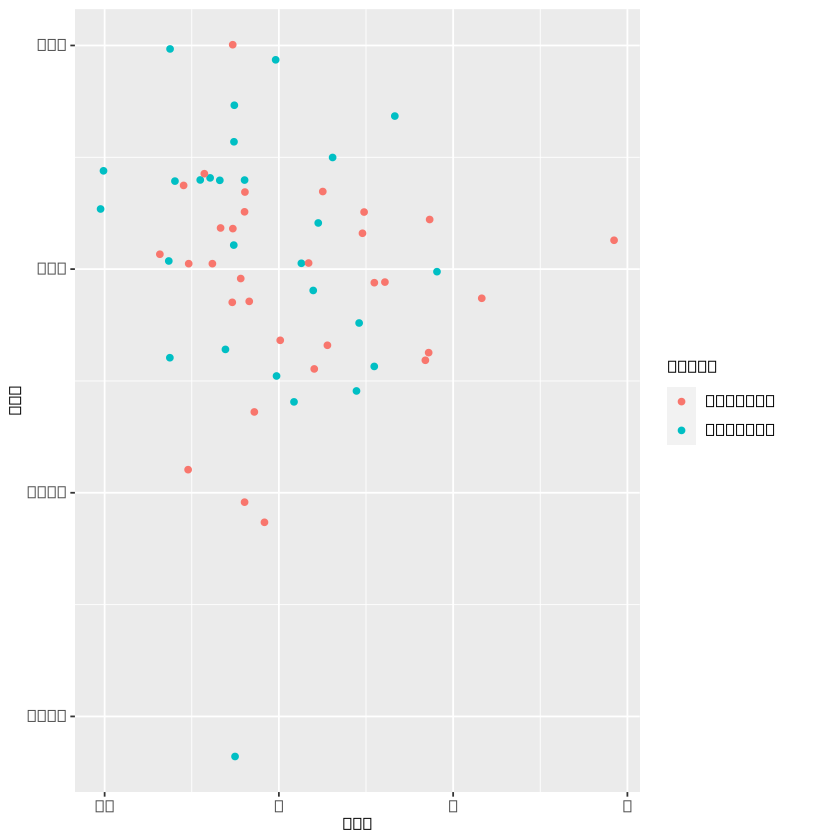

In [73]:
factors_mofa_cov [ , 1:15] %>% ggplot (aes (x =LF1, y =LF2 , color = Group )) +
    geom_point()

In [25]:
factorizations_icluster

ERROR: Error in eval(expr, envir, enclos): object 'factorizations_icluster' not found


In [26]:
  ###iCluster
factorizations_icluster<-iCluster2(lapply ( omics , t ) [1:2] , k=num.factors+1)
saveRDS(factorizations_icluster , "factorizations_icluster.RDS")  

In [24]:
lapply (lapply ( omics , t ) , dim)

$miRNA
[1]  58 751

$mRNA
[1]    58 14705

$DNAm
[1]     58 724504

In [ ]:
                                       
  ###intNMF
  factorizations_intnmf<-nmf.mnnals(dat=omics, k=num.factors)
saveRDS(factorizations_intnmf , "factorizations_intnmf.RDS")                                         
  ### JIVE

factorizations_jive<-jive(omics, rankJ=num.factors, rankA = rep(num.factors, length(omics)), method = "given", conv = "default", maxiter = 100, showProgress=FALSE)
saveRDS(factorizations_jive , "factorizations_jive.RDS")                                         

                                            
